In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def get_letters_in_file(file_path):
    with open(file_path) as f:
            doc = f.read()

    replace_chars = ['\n', '\t']
    for r_char in replace_chars:
        doc = doc.replace(r_char, '')
    letters_dict = Counter(doc)
    letters_dict['label'] = l
    
    return letters_dict

In [3]:
folder = 'languageID/'
languages = ['e', 'j', 's']
l_documents = []
for l in languages:
    for i in range(10):
        file = l + str(i) +'.txt'
        letters_dict = get_letters_in_file(folder + file)
        
        l_documents.append(letters_dict)

In [4]:
df = pd.DataFrame(l_documents)

In [5]:
df.shape
X = df.drop(['label'], axis=1)
y = df['label']

In [6]:
# alpha = 1/2
# Kl = 3 

# label_counts = df.groupby('label').sum().sum(axis=1)
# prior = (label_counts + alpha) / (label_counts.sum() + Kl*alpha)

# print('PRIOR:\n'+ str(prior))

In [7]:
alpha = 1/2
Kl = 3 
prior = (y.value_counts() + alpha) / (y.shape[0] + Kl*alpha)

print('PRIOR:\n' + str(prior))

PRIOR:
s    0.333333
j    0.333333
e    0.333333
Name: label, dtype: float64


In [8]:
sortby = list(map(chr, range(97, 123))) + [' ']

In [9]:
Ks = 27 
tot_l_in_label = df.groupby('label').sum().sum(axis=1)
l_in_label = df.groupby('label').sum().T
conditional_proba = (l_in_label + alpha) / (tot_l_in_label + Ks*alpha)

conditional_proba.loc[sortby]

label,e,j,s
a,0.060169,0.131766,0.104560
b,0.011135,0.010867,0.008233
c,0.021510,0.005486,0.037526
d,0.021973,0.017226,0.039746
e,0.105369,0.060205,0.113811
f,0.018933,0.003879,0.008603
g,0.017479,0.014012,0.007184
h,0.047216,0.031762,0.004533
i,0.055411,0.097033,0.049860
j,0.001421,0.002341,0.006629


In [10]:
conditional_proba.loc[sortby, 'e'].to_csv('images/conditional_proba_e.csv')

In [11]:
conditional_proba.loc[sortby, ['j', 's']].to_csv('images/conditional_proba_j_s.csv')

In [12]:
# (conditional_proba*prior).sort_index()

In [72]:
label = 'e'
i = 10
test_dict = get_letters_in_file(folder+label+str(i)+'.txt')
x_test = pd.Series(test_dict, name=label+str(i)+'_bow', index=sortby)
# x_test = df_test.drop('label')

x_test.loc[sortby].to_csv('images/bag_words_e10.csv')

# x_test = x_test/x_test.sum()

x_test.loc[sortby].to_csv('images/freq_words_e10.csv')

In [73]:
pd.Series(test_dict, name=label+str(i)+'_bow', index=sortby).sum()

2775

In [74]:
res = []
for l in languages:
    proba = (x_test * np.log(conditional_proba[l])).sum()
#     proba = (x_test * np.log10(conditional_proba[l])).sum()
    res.append([l, proba, np.exp(proba)])
df_e10_res = pd.DataFrame(res, columns=['language', 'conditionalLogProba', 'conditional']).set_index('language')
df_e10_res.to_csv('images/conditional_e10.csv')
df_e10_res

,conditionalLogProba,conditional
language,,
e,-7841.865447,0.0
j,-8771.433079,0.0
s,-8467.282044,0.0


In [71]:
df_e10_res['conditional']*2775

language
e    164.433884
j    117.628252
s    131.253848
Name: conditional, dtype: float64

In [45]:
posterior = df_e10_res['conditional']*prior
posterior.rename('posterior').to_csv('images/posterior_e10.csv')
posterior

e    0.019752
j    0.014130
s    0.015766
dtype: float64

In [46]:
results = []

for label in languages:
    for i in range(10, 20):
        test_dict = get_letters_in_file(folder+label+str(i)+'.txt')
        x_test = pd.Series(test_dict, name=label+str(i)+'_bow', index=sortby)
#         x_test = df_test.drop('label')
        x_test = x_test/x_test.sum()

        res = []
        for l in languages:
            # TODO add prior
            proba = (x_test * np.log(conditional_proba[l])).sum()
            res.append([l, proba, prior[l]*np.exp(proba)])
        results.append([label] + max(res, key=lambda x:x[2]))
#         results.append(max(res, key=lambda x:x[1]))

In [47]:
res_df = pd.DataFrame(results, columns=['label', 'pred', 'cond_log_proba', 'proba'])

In [48]:
# res_df

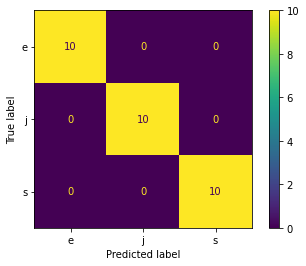

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(res_df['label'], res_df['pred'], labels=languages ) # TODO check if labels are assigned correctly
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=languages) # TODO check if labels are assigned correctly

disp.plot();

In [50]:
label = 'j'
i = 14
test_dict = get_letters_in_file(folder+label+str(i)+'.txt')
df_test = pd.Series(test_dict, name='test')
x_test = df_test.drop('label')
x_test = x_test/x_test.sum()


In [51]:
label = 's'
i = 14
file_path = folder+label+str(i)+'.txt'

with open(file_path) as f:
            doc = f.read()

replace_chars = ['\n', '\t']
for r_char in replace_chars:
    doc = doc.replace(r_char, '')

In [52]:
doc

'aunque los mexicanos empezaron a dominar a tener posesion del balon a ganar los rebotes y a presionar a los de casa desde la salida no pudieron tener claridad en las jugadas porque se defendieron bien los hondurenosun minuto despues carlos vela se olvido completamente del balon y le dio tremenda patada por atras a ramon nunez para recibir la roja del arbitro guatemalteco carlos batres quedarse dormido en el trabajowwwenplenitudcomsi eres de las que no se conforma con nada y tu afan por lucir siempre impecable te lleva de cabeza no debes desviar tu atencion de una parte muy escondida de tu belleza que sin embargo puede llegar a sugerirlo todo de ti hablamos de tus pestanasy no olvides al aplicar el rimel que el exceso de producto en el cepillo puede emborronar la mirada dejar grumos o convertir tus pestanas en un bloque rigido sin ningun atractivo un simple panuelo de papel puede servirte para retirar esos excesos del cepilloseguro que tu esteticien podra aconsejarte y limpiar la zona 

In [53]:
random = list(doc)
np.random.shuffle(random)
random = ''.join(random)

In [54]:
random

'snt ror uus qcaelesqegaopaooseee   dlemeceseonapeoiteaa tornannb aloadooeicmdze asei jnme  ttes  o otaptrlrsld oa au ceieaqn baosriascemdou a o rrxsezfne ftavrefsiatn esdryrzaenda  a atr pqs tei uraag aeradar pemnstadan eetoenpeltonaeo scrresmbir lmcdteanrssoijamuqa oomaao l nldaeesscaspae bpgo ran ll rdievaiiummrbqrideeebc e  allmdr  aieoeg ccre cstrac ioe ea cncoosiu aabptppbuumtoortoa rrtrnav icr eteexlmeau te drerdlunaae   ratauee iixc be nesoati ras sdtemn nirieutnna icnnenoc suoiaprai   l deppops bman s capwnat sesnja h ootrltrruidliecin yesl a  ltat rnsi acuoyooneilsrqoroulaieunlltcseuo n cdoui  ee  peoneir i taumdo pnlc e inn egea os rayi n t loiodmnraloam popno ed dizagpnlcd o  noualneeiq     ydmrceruuedab s ad zeaenealjel  ul b lr d h es aj oau  nmtlidazef s neaetdttce us odnemeetdn  enadtcetsomss elnir c auem ypeo tmc nvhlrjt eaewm l ni shl oe oe nma hmeccp  rap to dseotl tlas eaver aeoeuyeamnrsletgpup  n lcllc iarcsda  eosr nva wqaoliahcsaeeaiimndaieentmouibrpatnu eobr  ea

In [55]:
letters_dict = Counter(random)

In [56]:
random_df = pd.Series(letters_dict)

In [57]:
random_df = random_df/random_df.sum()

res = []
for l in languages:
    proba = (random_df * np.log(conditional_proba[l])).sum()
    res.append([l, np.exp(proba)])

In [58]:
res

[['e', 0.05430115377924316],
 ['j', 0.03946254797963188],
 ['s', 0.0614196897559195]]

In [59]:
max(res, key=lambda x:x[1])

['s', 0.0614196897559195]